<a href="https://colab.research.google.com/github/iyeboah22/GIS-DS/blob/main/ps1(Redo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#import libraries
import os, zipfile
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [21]:
#Read in Mental health disorder data
! wget -q -O Mental.csv  https://github.com/iyeboah22/GIS-DS/raw/main/Mental_20health_20Depression_20disorder_20Data.csv
geo_mh = pd.read_csv('Mental.csv')
#aok:files shouldnt have spaces or blanks in their names
#aok do it step by step as opposed to everything in one shot!


EmptyDataError: ignored

In [15]:

#Read in country coordinates
! wget -q -O countries2.csv  https://github.com/iyeboah22/GIS-DS/raw/main/countries_2.csv #aok: there is no such data file countries_2.csv in github! you need to upload it first
geo_coord=pd.read_csv('countries2.csv')

EmptyDataError: ignored

In [ ]:
#let's rename the columns to something shorter
map_names = {'Entity': 'country',
             'Code': 'code',
             'Year' : 'year',
             'Schizophrenia (%)':'schizo',
             'Bipolar disorder (%)':'bipolar',
             'Eating disorders (%)' : 'eating dis',
             'Anxiety disorders (%)' : 'anxiety',
             'Drug use disorders (%)':'drug',
             'Depression (%)':'depres',
             'Alcohol use disorders (%)':'alcohol'}

geo_mh.rename(columns=map_names,inplace=True)

geo_mh['schizo'] = pd.to_numeric(geo_mh['schizo'], errors='coerce')
geo_mh['bipolar'] = pd.to_numeric(geo_mh['bipolar'], errors='coerce')
geo_mh['eating dis'] = pd.to_numeric(geo_mh['eating dis'], errors='coerce')



geo_mh = geo_mh.drop(columns= ['index'])
print(geo_mh.info())

In [ ]:
#Dropping the rows which have non-numerical data, and so we concentrate on the rows up to 6467 for now
geo_mh.dropna(how='all')
geo_mh

,country,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.603590,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(geo_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    244 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       245 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB
None


In [ ]:
#Using lat and long to get geo points
geo_coord = gpd.GeoDataFrame(geo_coord, geometry=gpd.points_from_xy(geo_coord.latitude, geo_coord.longitude))
geo_coord.head()

,country,latitude,longitude,name,geometry
0,AD,42.546245,1.601554,Andorra,POINT (42.54624 1.60155)
1,AE,23.424076,53.847818,United Arab Emirates,POINT (23.42408 53.84782)
2,AF,33.939110,67.709953,Afghanistan,POINT (33.93911 67.70995)
3,AG,17.060816,-61.796428,Antigua and Barbuda,POINT (17.06082 -61.79643)
4,AI,18.220554,-63.068615,Anguilla,POINT (18.22055 -63.06862)


In [ ]:
geo_mh.rename(columns = {'country':'name'}, inplace = True)
geo_mh.head()


,name,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
geo_mh = geo_mh.merge(geo_coord, on='name')

geo_mh.head()

,name,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol,country,latitude,longitude,geometry
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,AF,33.93911,67.709953,POINT (33.93911 67.70995)
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,AF,33.93911,67.709953,POINT (33.93911 67.70995)
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,AF,33.93911,67.709953,POINT (33.93911 67.70995)
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,AF,33.93911,67.709953,POINT (33.93911 67.70995)
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,AF,33.93911,67.709953,POINT (33.93911 67.70995)


In [ ]:
#Have a quick look at the data through the years for one country
usa = geo_mh[geo_mh['code'] == 'USA']
usa.dropna(how='all')
print(usa)

                name code  year        schizo   bipolar  eating dis   anxiety  \
85000  United States  USA  1990  3.408970e-01  0.653706    0.468676  6.576884   
85001  United States  USA  1991  3.389130e-01  0.653953    0.473575  6.553351   
85002  United States  USA  1992  3.373430e-01  0.654205    0.478610  6.536143   
85003  United States  USA  1993  3.362070e-01  0.654431    0.483539  6.525536   
85004  United States  USA  1994  3.355360e-01  0.654620    0.488235  6.522278   
...              ...  ...   ...           ...       ...         ...       ...   
85491  United States  USA  2013  1.485464e+07       NaN         NaN       NaN   
85492  United States  USA  2014  1.500015e+07       NaN         NaN       NaN   
85493  United States  USA  2015  1.515513e+07       NaN         NaN       NaN   
85494  United States  USA  2016  1.532168e+07       NaN         NaN       NaN   
85495  United States  USA  2017  1.549936e+07       NaN         NaN       NaN   

           drug    depres  

In [ ]:
# create list of countries for North America to extract these into a separate dataframe
country_na = ['United States','Mexico',
                  'Greenland','Canada',
                  'Cuba','Jamaica',
                  'Panama','Haiti',
                  'Puerto Rico','Costa Rica',
                  'Dominican Republic','Guatemala',
                  'Honduras','Belize',
                  'The Bahamas...','Nicaragua',
                  'Martinique','Sint Maarten','Turks and Caicos Islands',
                  'Grenada','Saint Kitts and Nevis','Cayman Islands',
                  'United States Minor Outlying Islands','Antigua Barbuda','Anguilla',
                  'Dominica','Saint Lucia','Saint Vincet and the Grenadines',
                  'British Virgins Islands','Saint Pierre and Miquelon','United States Virgin Islands',
                  'Saint Barthelemy','Momtserrat','Saint Martin']

In [ ]:
usa = geo_mh[geo_mh['name'].isin(country_na)]

#print(usa)
usa.head()

,name,code,year,schizo,bipolar,eating dis,anxiety,drug,depres,alcohol,country,latitude,longitude,geometry
8628,Belize,BLZ,1990,0.190381,0.870972,0.211610,4.489253,0.809323,2.717497,1.542925,BZ,17.189877,-88.49765,POINT (17.18988 -88.49765)
8629,Belize,BLZ,1991,0.191191,0.871933,0.216008,4.494375,0.811845,2.725553,1.572840,BZ,17.189877,-88.49765,POINT (17.18988 -88.49765)
8630,Belize,BLZ,1992,0.191919,0.872827,0.220258,4.499428,0.814605,2.735803,1.600760,BZ,17.189877,-88.49765,POINT (17.18988 -88.49765)
8631,Belize,BLZ,1993,0.192536,0.873649,0.223665,4.504220,0.815405,2.745329,1.626030,BZ,17.189877,-88.49765,POINT (17.18988 -88.49765)
8632,Belize,BLZ,1994,0.193004,0.874343,0.226725,4.508290,0.816487,2.755676,1.647890,BZ,17.189877,-88.49765,POINT (17.18988 -88.49765)


In [ ]:
! wget -q -O usacanab.zip https://github.com/iyeboah22/GIS-DS/raw/main/usacanab.zip

zip_ref = zipfile.ZipFile('usacanab.zip', 'r');
zip_ref.extractall();
zip_ref.close()
na_shp = gpd.read_file('USACANAB.SHP') #load the shapefile with gpd
na_shp1 = na_shp.rename(columns = {'STATE':'country'})

zsh:1: command not found: wget


,AREA,PERIMETER,USACANAB_,USACANAB_I,country,geometry
0,1.402267e+12,1.747268e+07,2,2,AK,"POLYGON ((-3443500.066 6174508.418, -3442165.3..."
1,3.432067e+07,2.976427e+04,3,3,AK,"POLYGON ((-3453519.659 6184129.851, -3447842.5..."
2,4.827822e+07,6.520506e+04,4,11,AK,"POLYGON ((-3151742.881 6141425.438, -3150692.9..."
3,4.610291e+05,3.815993e+03,5,17,AK,"POLYGON ((-3064213.897 6097519.588, -3064866.1..."
4,1.114743e+05,2.127871e+03,6,19,AK,"POLYGON ((-3054634.205 6087155.623, -3054464.7..."


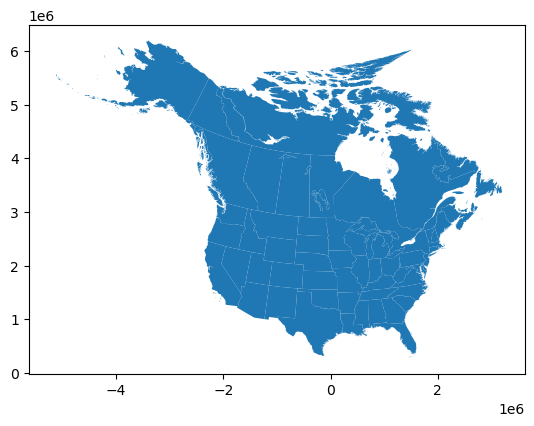

In [ ]:
na_shp1.plot()
na_shp1.head()

In [9]:

#having trouble merging

na_shp1 = pd.merge(na_shp1, usa, on='country',how='inner',indicator=True)
na_shp1.head()
#na_shp1.plot()

NameError: ignored

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

/Users/yeboahi/anaconda3/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [ ]:
# Alcohol Abuse
alc_data = dict(
        type = 'choropleth',
        colorscale = 'turbo',
        reversescale = True,
        locations = usa['name'],
        locationmode = "country names",
        z = usa['alcohol'],
        text = usa['country'],
        colorbar = {'title' : 'Alcohol Abuse %'},
      )
alc_layout = dict(title = 'Alcohol Abuse in North America in 2017',
              geo = dict({'scope':'north america'}, projection = {'type':'natural earth'}, showframe = True))

In [ ]:
go.Figure(data = [alc_data],layout = alc_layout)
choromap = go.Figure(data = [alc_data],layout = alc_layout)
iplot(choromap)

In [ ]:
# Depression
dep_data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = usa['name'],
        locationmode = "country names",
        z = usa['depres'],
        text = usa['country'],
        colorbar = {'title' : 'Depression %'},
      )
dep_layout = dict(title = 'Depressive Disorder in North America in 2017',
              geo = dict({'scope':'north america'}, projection = {'type':'natural earth'}, showframe = True))

In [ ]:
go.Figure(data = [dep_data],layout = dep_layout)
choromap = go.Figure(data = [dep_data],layout = dep_layout)
iplot(choromap)